# Example 4.4: Spectrum of moments and accelerations

<center>
<img src="./figures/Beam_simplysupport.svg" width="300">
</center>

## Modal properties


$$
\phi(x)=\sin \left(\dfrac{n \pi x}{L} \right)
$$


$$
k_* = \int_0^L EI(x) \left( \phi''(x) \right)^4 \, \text{d}x = EI \int_0^L \left( \dfrac{n \pi}{L} \right)^4 \sin^2\left( \dfrac{n \pi x}{L} \right) \, \text{d}x
= EI \left( \dfrac{n \pi}{L} \right)^4 \cdot \dfrac{L}{2} 
$$

$$
m_*=\int_0^L m(x) \phi (x) \: \text{d}x
= m \int_0^L  \sin^2(\dfrac{n \pi x}{L}) \: \text{d}x
=
\dfrac{mL}{2}
$$

$$
\omega_n=
\sqrt{\dfrac{k_*}{m_*}}=
n^2 \pi^2 \sqrt{ \dfrac{EI}{mL^4}}
$$


$$
\phi(x)=
\dfrac{1}{mL/2}
\sin \left(\dfrac{n \pi x}{L} \right)
$$
 

Natural frequencies in rad/s:
[ 3.12104295 12.4841718  28.08938656 49.93668722 78.02607378]


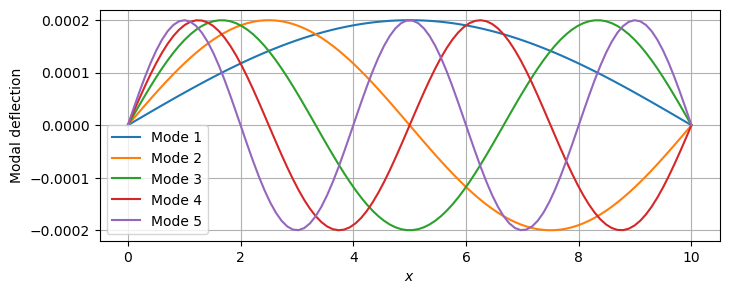

In [63]:
import numpy as np
from scipy import linalg as spla
from matplotlib import pyplot as plt

m=1000
L=10
EI=1e6

nm=5

omega_n=np.arange(1,nm+1)**2 *np.pi**2*np.sqrt(EI/(m*L**4))

print('Natural frequencies in rad/s:')
print(omega_n)

xi=0.03*np.ones_like(omega_n)

x=np.linspace(0,L,100)

plt.figure(figsize=(8,3))

# Plot 5 modes
for n in np.arange(1,nm+1):

    plt.plot(x, 1/(m*L/2)*np.sin(n*np.pi*x/L),label='Mode ' + str(n))

plt.xlabel('$x$')
plt.ylabel('Modal deflection')
plt.legend()
plt.grid()



## Load spectrum

$$
\mathbf{S}_{\mathbf{x}}(\omega)
=
\left[ \begin{array}{cc} 
S_{x_1}(\omega) & S_{x_1 x_2}(\omega) \\
S_{x_2 x_1}(\omega) & S_{x_2}(\omega)
\end{array} \right]
$$


$$
S_{x_1 x_2}(\omega)
=
\sqrt{ S_{x_1}(\omega) S_{x_2}(\omega) }
a
$$

where $-1<a<1$




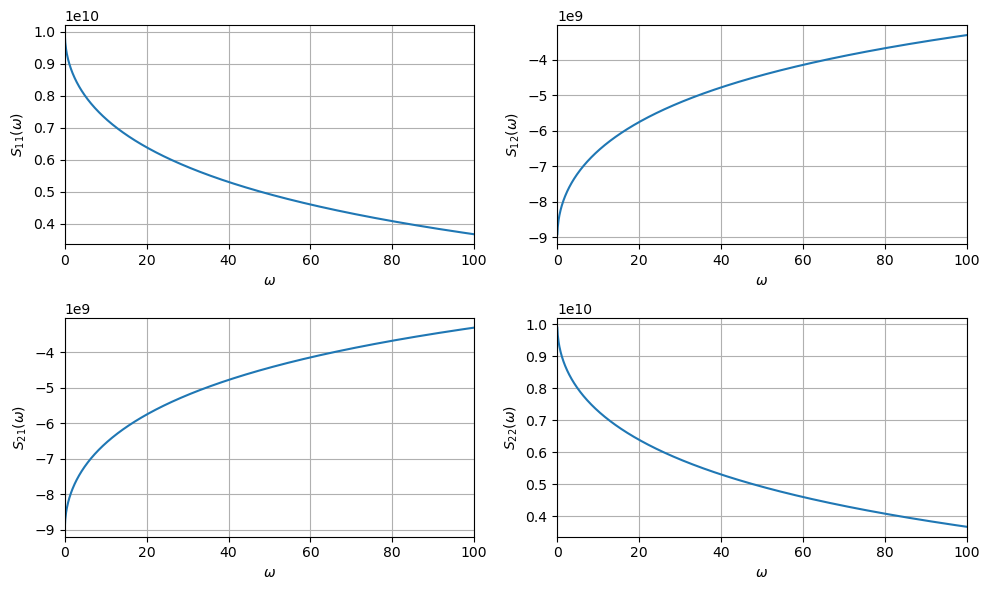

In [64]:
omega_axis=np.linspace(0.01,100,1000)

S0=1e10*np.exp(-0.1*omega_axis**0.5)

a=-0.9

Sx=np.zeros((2,2,len(omega_axis)))
Sx[0,0,:]=S0
Sx[1,1,:]=S0
Sx[0,1,:]=S0*a
Sx[1,0,:]=S0*a


# Plot
fig, axs = plt.subplots(2, 2,figsize=(10, 6))

for i in np.arange(2):
    for j in np.arange(2):
        axs[i,j].plot(omega_axis,Sx[i,j,:])
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,100)
        axs[i,j].grid(True)

plt.tight_layout()


## Modal load spectrum


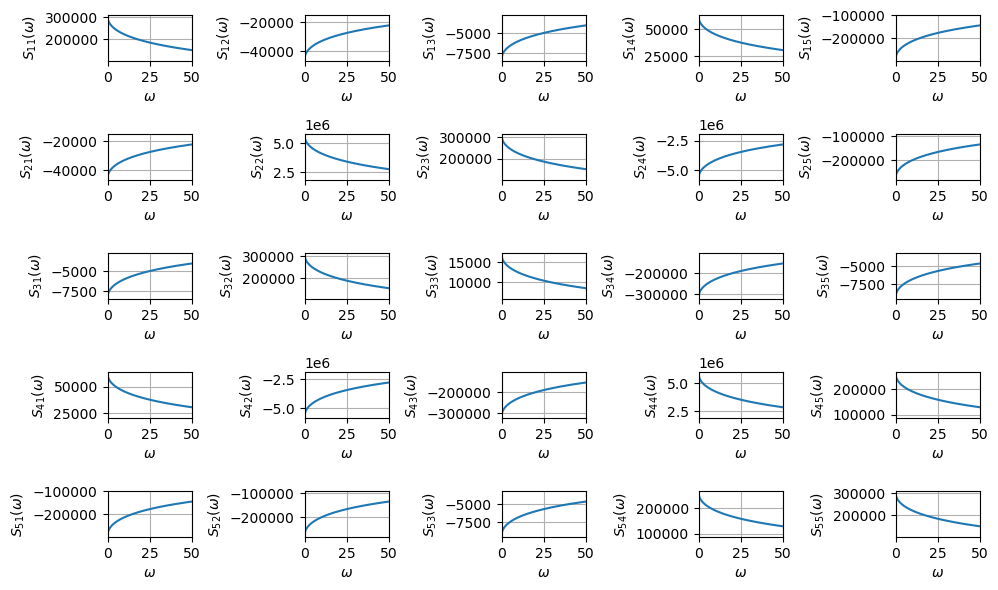

In [65]:

x_load=np.array([.33*L,0.66*L])

Phi_load=np.zeros((2,nm))
for n in np.arange(1,nm+1):
    Phi_load[:,n-1]=1/np.sqrt(m*L/2)*np.sin(n*np.pi*x_load/L)

Sx_modal=np.zeros((nm,nm,len(omega_axis)))
for k in np.arange(len(omega_axis)):
    Sx_modal[:,:,k]=Phi_load.T @ Sx[:,:,k] @ Phi_load

# Plot
fig, axs = plt.subplots(5, 5,figsize=(10, 6))

for i in np.arange(5):
    for j in np.arange(5):
        axs[i,j].plot(omega_axis,Sx_modal[i,j,:])
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,50)
        axs[i,j].grid(True)

plt.tight_layout()


## Frequency response function


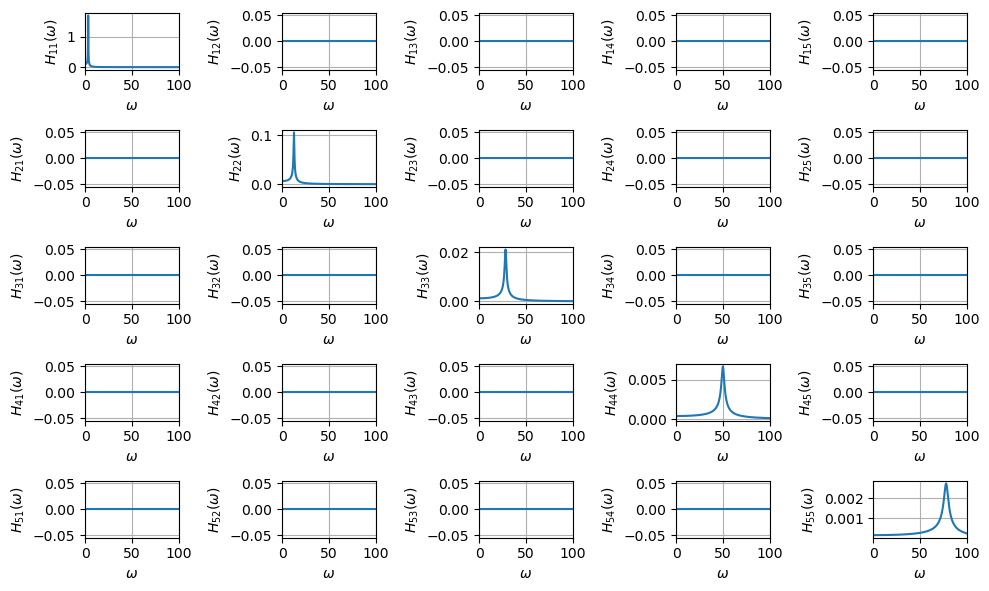

In [66]:
H_modal=np.zeros((nm,nm,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    tmp=-omega_axis[k]**2*np.eye(nm)+1j*omega_axis[k]*2*np.diag(omega_n)*np.diag(xi)+np.diag(omega_n)**2
    H_modal[:,:,k]=np.linalg.inv(tmp)

# Plot
fig, axs = plt.subplots(5, 5,figsize=(10, 6))

for i in np.arange(5):
    for j in np.arange(5):
        axs[i,j].plot(omega_axis,np.abs(H_modal[i,j,:]))
        #axs[i,j].plot(omega_axis,np.imag(H_modal[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$H_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,100)
        axs[i,j].grid(True)

plt.tight_layout()


## Modal response spectrum


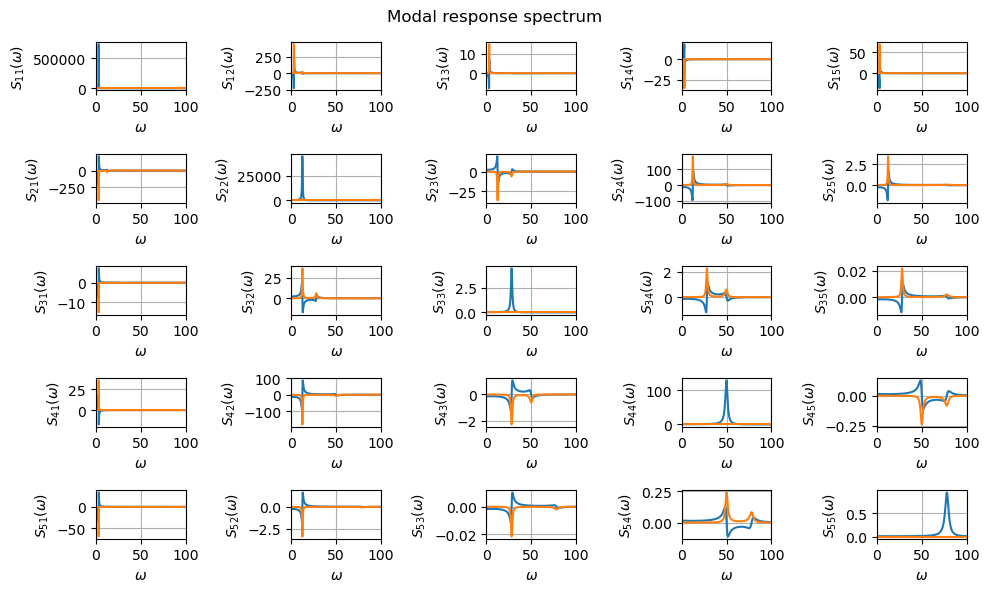

In [67]:

Sz=np.zeros((nm,nm,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sz[:,:,k]=H_modal[:,:,k] @ Sx_modal[:,:,k] @ np.conj(H_modal[:,:,k]).T

# Plot
fig, axs = plt.subplots(5, 5,figsize=(10, 6))

for i in np.arange(5):
    for j in np.arange(5):
        axs[i,j].plot(omega_axis,np.real(Sz[i,j,:]))
        axs[i,j].plot(omega_axis,np.imag(Sz[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,100)
        axs[i,j].grid(True)

fig.suptitle('Modal response spectrum')

plt.tight_layout()

## Displacement response spectrum



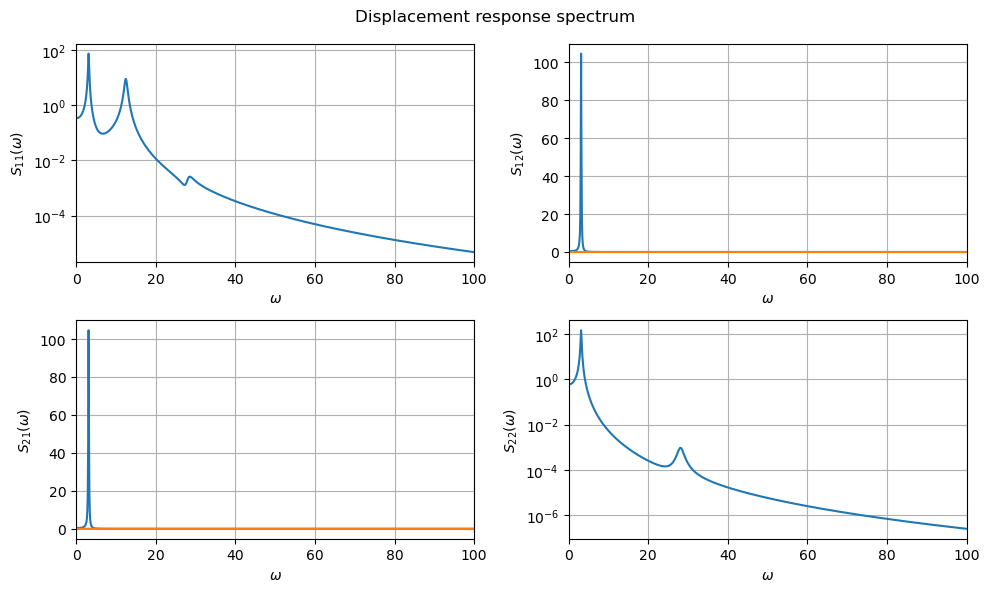

In [68]:
x_disp=np.array([0.25*L,0.5*L])

Phi_disp=np.zeros((2,nm))
for n in np.arange(1,nm):
    Phi_disp[:,n-1]=1/np.sqrt(m*L/2)*np.sin(n*np.pi*x_disp/L)


Sy=np.zeros((2,2,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sy[:,:,k]=Phi_disp @ Sz[:,:,k] @ Phi_disp.T

# Plot
fig, axs = plt.subplots(2, 2,figsize=(10, 6))

for i in np.arange(2):
    for j in np.arange(2):
        axs[i,j].plot(omega_axis,np.real(Sy[i,j,:]))

        if i!=j: 
            axs[i,j].plot(omega_axis,np.imag(Sy[i,j,:]))
        
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,100)
        axs[i,j].grid(True)

        if i==j:
            axs[i,j].set_yscale('log')

fig.suptitle('Displacement response spectrum')

plt.tight_layout()

## Moment response spectrum


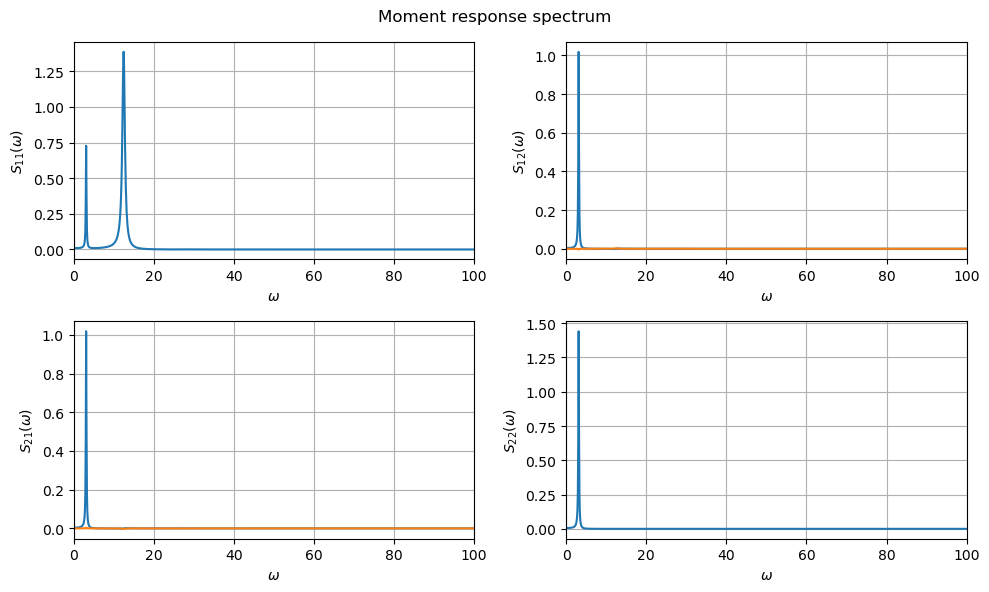

In [69]:
x_moment=np.array([0.25*L,0.5*L])

Phi_moment=np.zeros((2,nm))
for n in np.arange(1,nm):
    Phi_moment[:,n-1]=1/np.sqrt(m*L/2)*(n*np.pi/L)**2*np.sin(n*np.pi*x_moment/L)


Sm=np.zeros((2,2,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sm[:,:,k]=Phi_moment @ Sz[:,:,k] @ Phi_moment.T

# Plot
fig, axs = plt.subplots(2, 2,figsize=(10, 6))

for i in np.arange(2):
    for j in np.arange(2):
        axs[i,j].plot(omega_axis,np.real(Sm[i,j,:]))

        if i!=j: 
            axs[i,j].plot(omega_axis,np.imag(Sm[i,j,:]))
        
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,100)
        axs[i,j].grid(True)

        #if i==j:
            #axs[i,j].set_yscale('log')

fig.suptitle('Moment response spectrum')

plt.tight_layout()

## Shear response spectrum


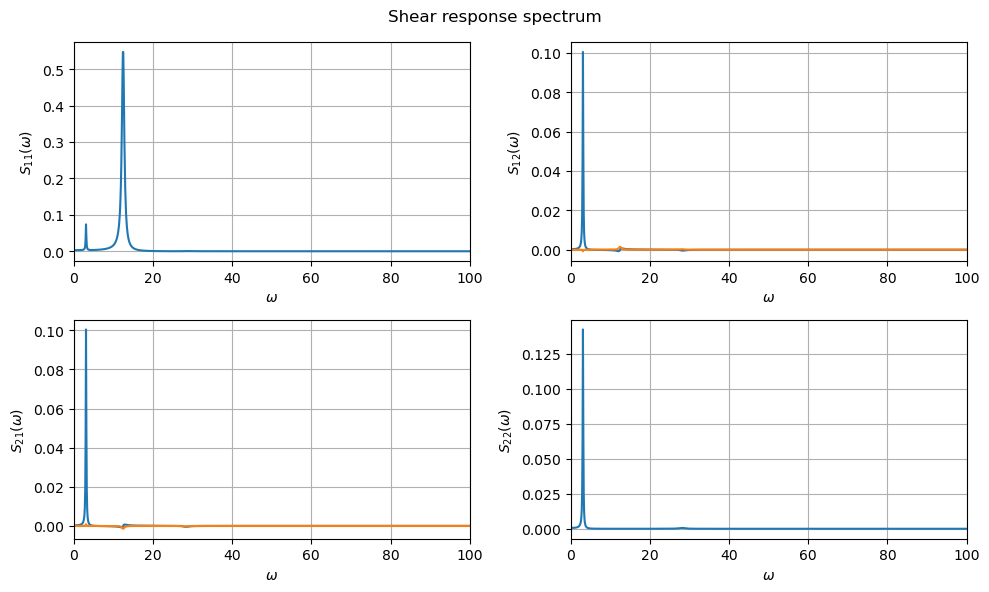

In [70]:
x_shear=np.array([0.25*L,0.5*L])

Phi_shear=np.zeros((2,nm))
for n in np.arange(1,nm):
    Phi_shear[:,n-1]=1/np.sqrt(m*L/2)*(n*np.pi/L)**3*np.sin(n*np.pi*x_shear/L)


Sv=np.zeros((2,2,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sv[:,:,k]=Phi_shear @ Sz[:,:,k] @ Phi_shear.T

# Plot
fig, axs = plt.subplots(2, 2,figsize=(10, 6))

for i in np.arange(2):
    for j in np.arange(2):
        axs[i,j].plot(omega_axis,np.real(Sv[i,j,:]))

        if i!=j: 
            axs[i,j].plot(omega_axis,np.imag(Sv[i,j,:]))
        
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,100)
        axs[i,j].grid(True)

        #if i==j:
            #axs[i,j].set_yscale('log')

fig.suptitle('Shear response spectrum')

plt.tight_layout()

## Acceleration response spectrum


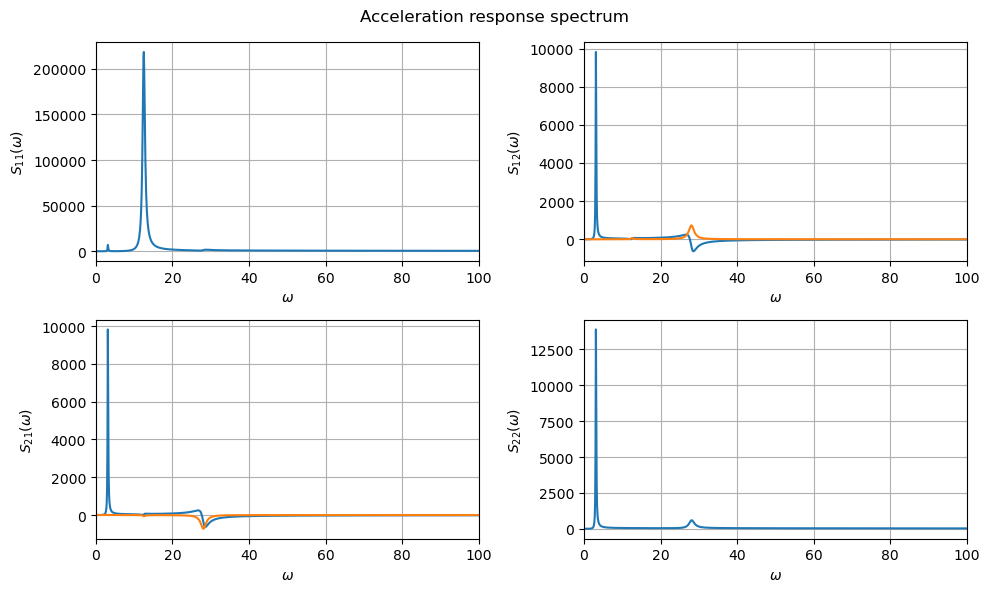

In [71]:

Syddot=np.zeros_like(Sy)
for k in np.arange(len(omega_axis)):
    Syddot[:,:,k]=Sy[:,:,k]*omega_axis[k]**4

# Plot
fig, axs = plt.subplots(2, 2,figsize=(10, 6))

for i in np.arange(2):
    for j in np.arange(2):
        axs[i,j].plot(omega_axis,np.real(Syddot[i,j,:]))

        if i!=j: 
            axs[i,j].plot(omega_axis,np.imag(Syddot[i,j,:]))
        
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega)$')
        axs[i,j].set_xlim(0,100)
        axs[i,j].grid(True)

        #if i==j:
            #axs[i,j].set_yscale('log')

fig.suptitle('Acceleration response spectrum')

plt.tight_layout()